In [1]:
# Feature Extraction with RFE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



In [52]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [6]:
def featureSelection():
    df = pd.read_csv("cleanData.csv",index_col='ID')
    impAttr = ['EDUCATION','MARRIAGE','LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',\
               'PAY_AMT1', 'PAY_AMT2', 'PAY_1','PAY_2', 'DEFAULT_PAYMENT_NEXT_MONTH']
    df = df.loc[:,impAttr]
    df = pd.get_dummies(df)
    dfy = df['DEFAULT_PAYMENT_NEXT_MONTH']
    dfx = df.drop('DEFAULT_PAYMENT_NEXT_MONTH',axis =1)
    
    
    X = dfx.values
    y = dfy.values
    
    
    #Standardizing the values
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    return X,y

In [7]:
X,y = featureSelection()
X.shape


C:\Users\jeeva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(30000, 18)

In [8]:
def fulldataPrecisionRecall(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)

    log = classifier
    pred_y=log.predict(X_test) 

    probs_y=log.predict_proba(X_test) 
    precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
    pr_auc = auc(recall, precision)
    plt.title("Precision-Recall vs Threshold Chart")
    plt.plot(thresholds, precision[: -1], "b--", label="Precision")
    plt.plot(thresholds, recall[: -1], "r--", label="Recall")
    plt.ylabel("Precision, Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0,1])
    

    
    
    return True


True

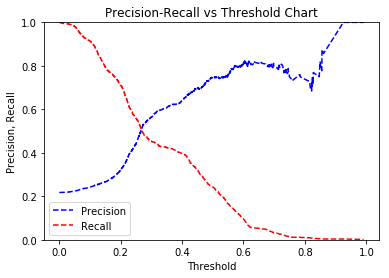

In [10]:
fulldataPrecisionRecall(X,y)

### We can observe that instead of a threshold of 0.5, it is better to take a threshold at 0.35

In [11]:
def fulldataROC(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)

    pred_y=classifier.predict(X_test) 


    probs = classifier.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return True


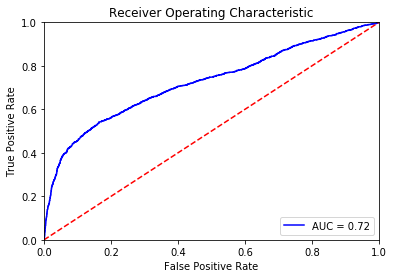

True

In [13]:
fulldataROC(X,y)

### Ideally the ROC's AUC ranges between 0.5 to 1 we got 0.72 which is better than base nodel

In [66]:
def logitVarThreshold(X,y,threshold):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)

    pred_y=classifier.predict(X_test) 


    probs = classifier.predict_proba(X_test)
    actualProbs = probs[:,0]
    
    
    for i in range(len(actualProbs)):
        if actualProbs[i] < threshold:
            actualProbs[i] = 0
        else:
            actualProbs[i] = 1
    predClass = actualProbs

    cm = confusion_matrix(y_test, predClass)
    precision,recall,fscore,support = precision_recall_fscore_support(y_test, predClass, average='macro')
    
    accuracy = accuracy_score(y_test, predClass)
    accuracyl = accuracy_score(y_test, pred_y)
    
    
    return accuracy,precision,recall,fscore,accuracyl
    

In [64]:
threshold = np.linspace(0,1,50)
accuracy =[logitVarThreshold(X,y,threshold[i])[0] for i in range(len(threshold))]
precision =[logitVarThreshold(X,y,threshold[i])[1] for i in range(len(threshold))]
recall =[logitVarThreshold(X,y,threshold[i])[2] for i in range(len(threshold))]
fscore =[logitVarThreshold(X,y,threshold[i])[3] for i in range(len(threshold))]
accuracyl = [logitVarThreshold(X,y,threshold[i])[4] for i in range(len(threshold))]
           

C:\Users\jeeva\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


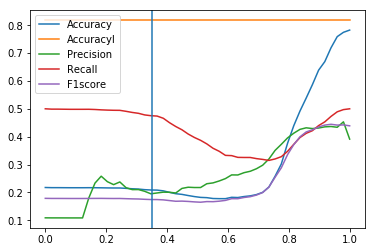

In [65]:
plt.plot(threshold,accuracy,label = "Accuracy")
plt.plot(threshold,accuracyl,label = "Accuracyl")
plt.plot(threshold,precision,label = "Precision")
plt.plot(threshold,recall,label = "Recall")
plt.plot(threshold,fscore,label = "F1score")
plt.axvline(x=0.35)
plt.legend(loc="upper left")


In [77]:
def logitVarThres(X,y,threshold=0.5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)

    pred_y=classifier.predict(X_test) 


    probs = classifier.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, pred_y)
    
    
    precision,recall,fscore,support = precision_recall_fscore_support(y_test, pred_y, average='macro')
    return pred_y,probs,accuracy,precision,recall,fscore,support

In [83]:
pred_y,probs,accuracy,precision,recall,fscore,support = logitVarThres(X,y,threshold=0.5)
print(accuracy,precision,recall,fscore)

0.8177333333333333 0.7866550296543146 0.6103824581980031 0.6304750114425697


In [84]:
def downsample():
    
    df = pd.read_csv("cleanData.csv",index_col='ID')
    impAttr = ['EDUCATION','MARRIAGE','LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',\
               'PAY_AMT1', 'PAY_AMT2', 'PAY_1','PAY_2', 'DEFAULT_PAYMENT_NEXT_MONTH']
    df = df.loc[:,impAttr]
    df = pd.get_dummies(df)

    # Separate majority and minority classes
    df_majority = df[df.DEFAULT_PAYMENT_NEXT_MONTH==0]
    df_minority = df[df.DEFAULT_PAYMENT_NEXT_MONTH==1]

    # Downsample majority class
    df_majority_downsampled = resample(df_majority, replace=False,n_samples=6636,random_state=123)
                                       

    # Combine minority class with downsampled majority class
    df_downsampled = pd.concat([df_majority_downsampled, df_minority])
    print(df_downsampled.DEFAULT_PAYMENT_NEXT_MONTH.value_counts())
    
    
    dfy = df_downsampled['DEFAULT_PAYMENT_NEXT_MONTH']
    dfx = df_downsampled.drop('DEFAULT_PAYMENT_NEXT_MONTH',axis =1)
    
    
    X = dfx.values
    y = dfy.values
    
    
    #Standardizing the values
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    
    
    return X,y

In [85]:
X,y = downsample()


1    6636
0    6636
Name: DEFAULT_PAYMENT_NEXT_MONTH, dtype: int64


C:\Users\jeeva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [87]:
pred_y,probs,accuracy,precision,recall,fscore,support = logitVarThres(X,y,threshold=0.5)
print(accuracy,precision,recall,fscore)

0.6805304400241109 0.6818876038906205 0.6812489436139761 0.6803881854822293


In [88]:
def downsampledROC(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)

    pred_y=classifier.predict(X_test) 


    probs = classifier.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return True

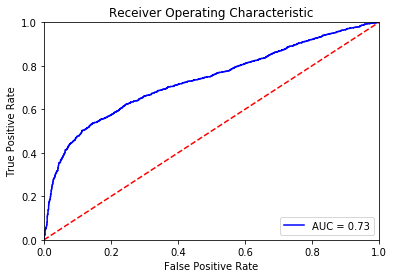

True

In [89]:
downsampledROC(X,y)

In [90]:
def downsampledPrecisionRecall(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)

    log = classifier
    pred_y=log.predict(X_test) 

    probs_y=log.predict_proba(X_test) 
    precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
    pr_auc = auc(recall, precision)
    plt.title("Precision-Recall vs Threshold Chart")
    plt.plot(thresholds, precision[: -1], "b--", label="Precision")
    plt.plot(thresholds, recall[: -1], "r--", label="Recall")
    plt.ylabel("Precision, Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0,1])
    

    
    
    return True

True

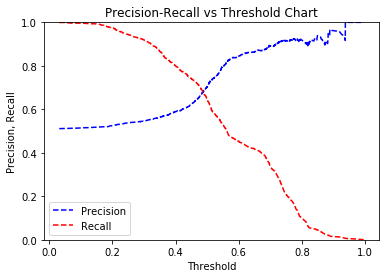

In [91]:
downsampledPrecisionRecall(X,y)